In [67]:
import pandas as pd 
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set(color_codes=True)

import datetime

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

dataset = pd.read_csv("./Desktop/FYP/testdata3.csv")

In [3]:
type(dataset.values)
corpus = dataset.head(1)
#print(corpus)

In [4]:
JD = dataset["jobdescription"]
corpus = ""
for i in JD:
    corpus += str(i)
    #corpus.append(str(i))
    #print (type(i))
#corpus
#print(type(JD))

In [5]:
#Import Lib & Creating Objects
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

data = []

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [6]:
#Cleaning Dataset
for i in range (0, len(JD)):
    review = re.sub('[^a-zA-Z]', ' ', JD[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) 
               for word in review 
                  if not word in stopwords.words('english')]
    review = ' '.join(review)
    #print (type(review))
    data.append(review)   

In [8]:
#Printing Clean Data

print(type(data))
#data[99]

<class 'list'>


In [9]:
#TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
matrix_input = tfidf.fit_transform(data)
matrix_input

<149x4285 sparse matrix of type '<class 'numpy.float64'>'
	with 23413 stored elements in Compressed Sparse Row format>

In [10]:
#Resultant Matrix Conversion Into Array Format

X = matrix_input.toarray()
X

array([[0.        , 0.        , 0.06246661, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16695189, 0.        ,
        0.        ]])

In [ ]:
#Mean Shift Clustering

from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

#bandwidth = estimate_bandwidth(X,quantile=1, n_samples=10)
ms = MeanShift(bandwidth=1, bin_seeding=False).fit(X)
ms

In [ ]:
#Cluster ID's

print(ms.labels_)

In [ ]:
#Unique Cluster ID's

labels_unique_ms = np.unique(ms.labels_)
labels_unique_ms

In [ ]:
#Total No of Clusters

n_clusters = len(labels_unique_ms)
n_clusters

In [ ]:
clusters_center = ms.cluster_centers_
clusters_center
dic= {}
labels = ms.labels_
counter = 0
for i in labels:
    if(i not in dic):
        dic[i] = [data[counter]]
    else:
        dic[i].append(data[counter])
        
    counter += 1

In [ ]:
#Printing Dictionary Data
lenOfDic = len(dic)
lenOfDic
print(len(dic[3]))

In [ ]:
#print(dic) #id = integer and value = multiple list of string #Merge JDS In Specific Cluster
new_dic = {}
string = ""
count = 0
for clus_id in dic:
    jds = dic[clus_id]
    length = len(jds)
    for i in range(length):
        string += jds[i]
        string += "\n"
    new_dic[clus_id] = string
    string = ""

print(new_dic[0])


In [ ]:
len(dic[2])

In [ ]:
#Yet Another Keyword Extractor - YAKE

import yake



In [ ]:
#Keywords Extraction 

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

all_keywords = []

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
dic_kw = {}
for i in range(len(new_dic)):
    words = []
    keywords = custom_kw_extractor.extract_keywords(new_dic[i])
    for kw in keywords:
           words.append(kw)
    dic_kw[i] = words
    #all_keywords.append(words)
print(dic_kw[0])

In [ ]:
#YAKE All Keywords Printing
print (dic_kw[200])

In [ ]:
def get_keywords(integer,data_list):
    specific_data = data_list[integer]
    for words in specific_data:
        print(words)

In [ ]:
get_keywords(251,dic_kw)

In [ ]:
#Highlight Keywords in the Textual Data

from yake.highlight import TextHighlighter

th = TextHighlighter(max_ngram_size = 3)
th.highlight(data[0], all_keywords[0])

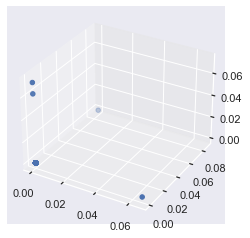

In [112]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
#ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()


In [ ]:
### DB SCAN

from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=1, min_samples=1).fit(X)
clustering

In [ ]:
clustering.labels_

In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)

In [12]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
print(X)

[[0.         0.         0.06246661 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.16695189 0.         0.        ]]


In [29]:
km_Labels = km.labels_
print(km_Labels)

[6 4 6 6 6 7 4 6 6 1 6 4 3 7 3 4 6 3 7 6 7 7 4 7 3 7 1 9 4 5 5 7 7 8 3 3 8
 6 3 1 4 4 6 7 7 2 2 6 4 2 6 6 1 7 6 5 7 5 6 4 6 3 8 6 3 8 4 4 6 6 7 6 4 7
 5 5 3 5 3 7 4 6 3 6 6 6 6 6 3 4 5 8 5 5 4 4 0 9 2 6 6 6 6 6 4 0 6 6 1 2 0
 0 6 2 4 4 6 1 4 6 5 9 0 0 2 6 9 2 9 2 0 0 0 4 6 0 7 8 0 4 6 0 0 6 2 2 6 2
 6]


In [31]:
unique_labels_km = np.unique(km.labels_)
print (unique_labels_km)

clus = len(km_Labels)


[0 1 2 3 4 5 6 7 8 9]


149

In [32]:
dicKM= {}
labels = km.labels_
counter = 0
for i in labels:
    if(i not in dicKM):
        dicKM[i] = [data[counter]]
    else:
        dicKM[i].append(data[counter])
        
    counter += 1

In [111]:
# print(dicKM[0]) 

In [124]:
import matplotlib.pyplot as plt

# print(len(km_Labels))
# print(len(X))

plt.scatter(km_Labels)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [95]:
#print(new_dicKM)

In [38]:
#print(dic) #id = integer and value = multiple list of string
new_dicKM = {}
string_KM = ""
count_KM = 0
for clus_id in dicKM:
    jds = dicKM[clus_id]
    length = len(jds)
    for i in range(length):
        string_KM += jds[i]
        string_KM += "\n"
        #print(string)
    new_dicKM[clus_id] = string_KM
    string_KM = ""

#print(new_dic[0])

In [63]:
#print(new_dicKM[0])

In [46]:
#Yet Another Keyword Extractor - YAKE

import yake

#Keywords Extraction 

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

all_keywords = []

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
dic_kw = {}
for i in range(len(new_dicKM)):
    words = []
    keywords = custom_kw_extractor.extract_keywords(new_dicKM[i])
    for kw in keywords:
           words.append(kw)
    dic_kw[i] = words
    #all_keywords.append(words)


[('consultant princeton information', 4.532882697898727e-07), ('success client consultant', 6.737106803151171e-07), ('princeton information committed', 6.991481759530014e-07), ('commitment consultant princeton', 7.717747051744613e-07), ('company princeton information', 9.288633637071017e-07), ('princeton information service', 9.416343110333903e-07), ('committed ensure consultant', 1.0123396480282291e-06), ('committed success client', 1.039212685151903e-06), ('relationship relationship client', 1.113817646028644e-06), ('information committed ensure', 1.1540080371243064e-06), ('client consultant shareholder', 1.1795362418804424e-06), ('princeton information operates', 1.2208256268472009e-06), ('million princeton information', 1.242224393133662e-06), ('princeton information solely', 1.242224393133662e-06), ('client opportunity work', 1.511376718994142e-06), ('held company princeton', 1.5665241092573969e-06), ('organization ensures princeton', 1.605288426338491e-06), ('consultant privately

In [49]:
#YAKE All Keywords Printing
#print (dic_kw)

In [60]:
def get_keywords(integer,data_list):
    specific_data = data_list[integer]
    for words in specific_data:
        print(words)

In [61]:
get_keywords(1,dic_kw)

('solution million medium', 7.158329019316532e-05)
('million medium file', 7.299072506811104e-05)
('management solution million', 8.454776028394577e-05)
('medium file process', 8.628739825789062e-05)
('video publishing management', 8.974575006092316e-05)
('high profile medium', 9.042840009593786e-05)
('medium company rely', 9.310420013301877e-05)
('file process million', 9.337233721847489e-05)
('process million hit', 9.337233721847489e-05)
('sport network nbc', 9.388009183347023e-05)
('network nbc sport', 9.388009183347023e-05)
('fox sport network', 9.388009183347025e-05)
('syfy fox sport', 9.448355527626735e-05)
('nbc sport national', 9.448355527626735e-05)
('sport national geographic', 9.448355527626735e-05)
('billion internet video', 9.460596917115508e-05)
('internet video view', 9.460596917115508e-05)
('day medium company', 9.636954804285209e-05)
('publishing management solution', 9.728818424103457e-05)
('supporting streaming video', 9.785839096074889e-05)


In [85]:
#plot libs 

data1 = len(dicKM[0])
data2 = len(dicKM[1])

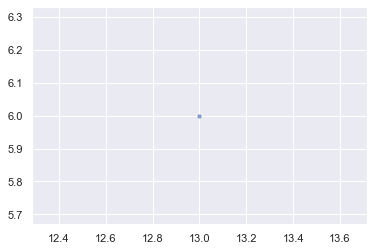

In [89]:
from sklearn.cluster import KMeans
import numpy as np


plt.scatter(data1,data2 , alpha = 0.6, s = 10)

